# Importando a Base de Dados

In [1]:
import pandas as pd
!pip install seaborn==0.9.0
import seaborn as sns

In [ ]:
dados = pd.read_csv('tips.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# Traduzindo

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
translate = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia',
    'time' : 'hora',
    'size' : 'pessoas'
}

In [ ]:
gorjetas = dados.rename(columns = translate)

In [ ]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [ ]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dia_semana = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia = gorjetas.dia.map(dia_semana)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [ ]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora_do_almoco = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora = gorjetas.hora.map(hora_do_almoco)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Análise I - Comparando distribuições de maneira exploratória

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


## Será que o valor da conta influencia no valor da gorjeta?

Text(0.5, 0.98, 'Valor da conta x Valor da gorjeta')

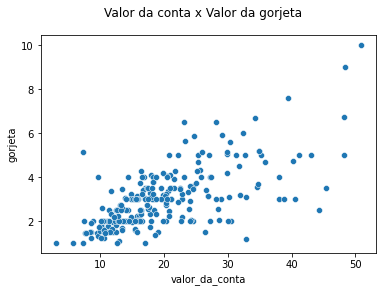

In [ ]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)
valor_gorjeta.figure.suptitle('Valor da conta x Valor da gorjeta')

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [ ]:
# A base de dados não contém valores nulos que podem influenciar na nossa análise exploratória:

In [ ]:
print(f'A base de dados contém {gorjetas.shape[0]} registros \n')

print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos:


valor_da_conta    244
gorjeta           244
sobremesa         244
dia               244
hora              244
pessoas           244
dtype: int64

## Porcentagem

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


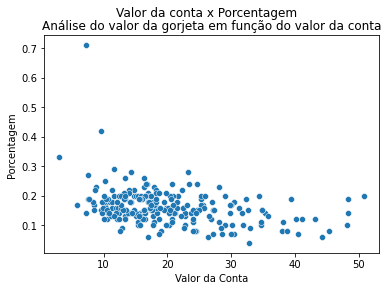

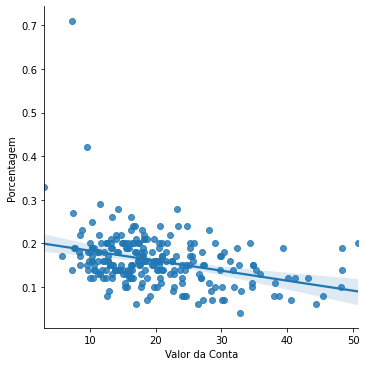

In [ ]:
valor_porcentagem = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)
valor_porcentagem.set_title('Análise do valor da gorjeta em função do valor da conta')
valor_porcentagem.figure.suptitle('Valor da conta x Porcentagem')
valor_porcentagem.set(xlabel = 'Valor da Conta', ylabel = 'Porcentagem')

valor_porcentagem_lm = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)
valor_porcentagem_lm.set(xlabel = 'Valor da Conta', ylabel = 'Porcentagem')

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

# Análise II - Análise sobre a influência da sobremesa

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


## Será que a sobremesa influencia no valor da gorjeta?

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

# Dos 244 registros que nós temos, 93 pessoas pediram sobremesa;
# Dessas 93 pessoas, a média de valor da conta foi de 20;
# Dessas 93 pessoas, a média de valor da gorjeta foi de 3.

,valor_da_conta,gorjeta,pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

# Dos 244 registros que nós temos, 151 pessoas não pediram sobremesa;
# Dessas 151 pessoas, a média de valor da conta foi de 19;
# Dessas 93 pessoas, a média de valor da gorjeta foi de 2,99.

,valor_da_conta,gorjeta,pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


**Fazendo uma análise categórica:**

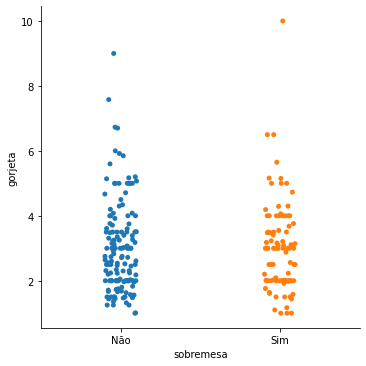

In [ ]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

**Gráfico de relação do "Sim" e "Não":**

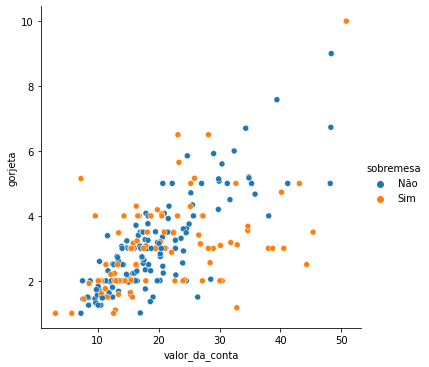

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

**Gráficos de relações separados para melhor vsualização:**

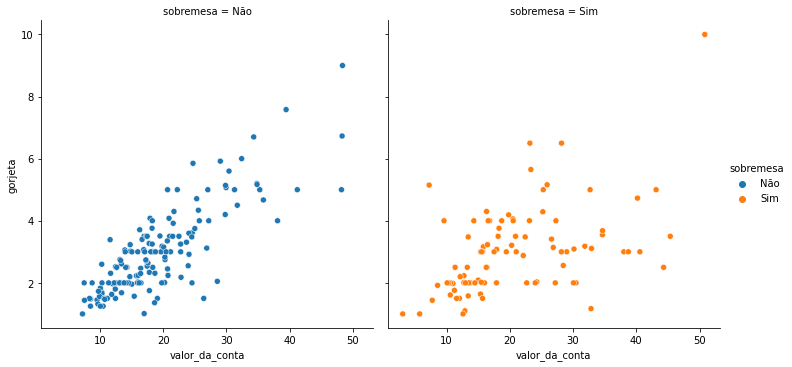

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

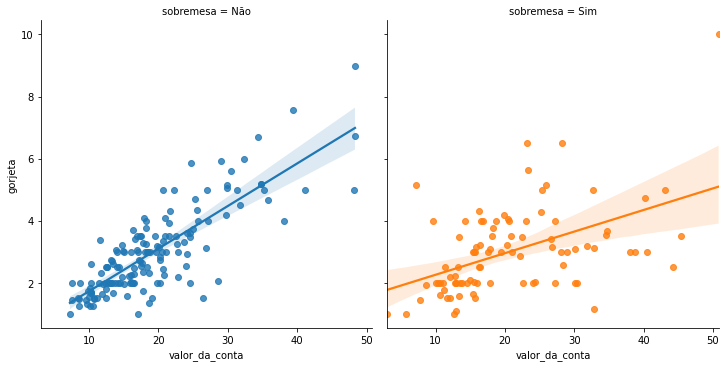

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

**Gráficos separados baseados no "Valor da conta" x "Porcentagem"**

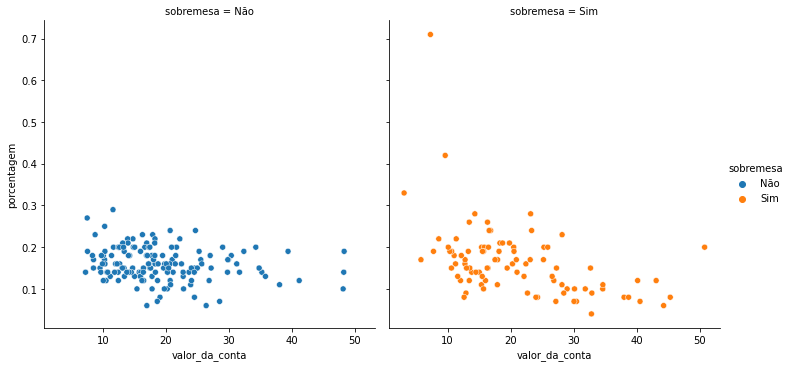

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)


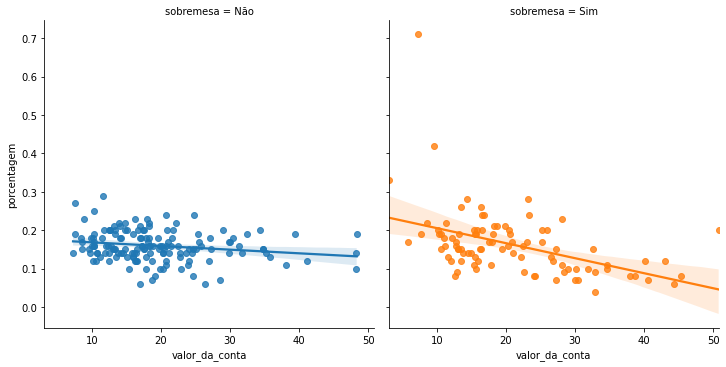

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

## Teste de hipótese

## H<sup>null</sup>

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

## H<sup>alt</sup>

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [ ]:
# Importando o ranksums (também conhecido como teste de Soma de Postos de Wilcoxon-Mann-Whitney) da biblioteca SciPy.
# Ranksums serve para comparar dois grupos e verificar se eles provém de uma mesma distribuição de probabilidade.

from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [ ]:
print(f'O valor do p-value é {r.pvalue}')

O valor do pvalue é 0.5266635660124415


**Nesse caso a hipótese é nula, pois matematicamente a diferença é insignificante. Sendo assim, a distribuição da taxa da gorjeta é a mesma nos dois grupos. Se p-value < 0,05, então um evento raro aconteceu e a hipótese nula seria descartada.**

# Análise III - Análise sobre a influencia dos dias da semana

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


## Será que os dias da semana influenciam no valor da gorjeta?

In [ ]:
gorjetas.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

**Valor da conta conforme dia da semana:**

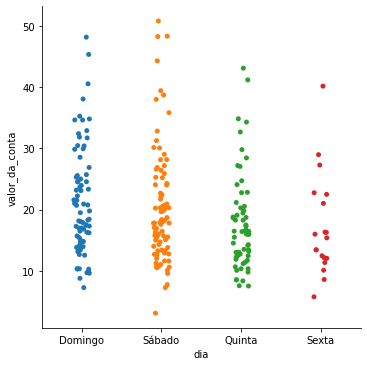

In [ ]:
sns.catplot(x = 'dia', y = 'valor_da_conta', data = gorjetas)

**Valor da conta e da gorjeta relacionados aos dias da semana:**

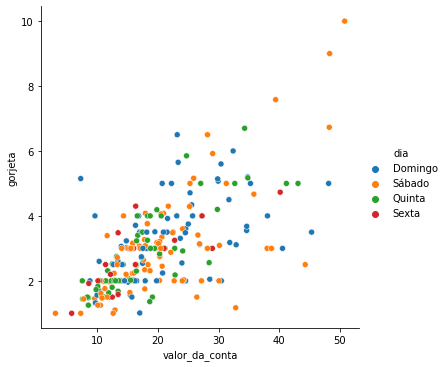

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia', data = gorjetas)

**Valor da conta e da porcentagem relacionados aos dias da semana:**

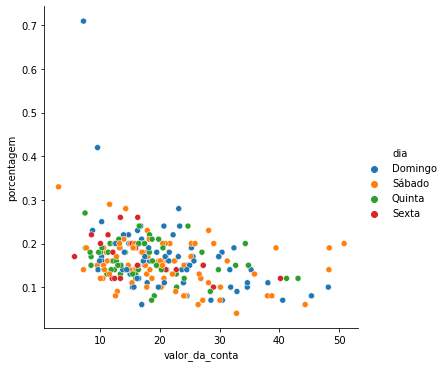

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia', data = gorjetas)

**Valor da conta e da gorjeta relacionados aos dias da semana em gráficos separados:**

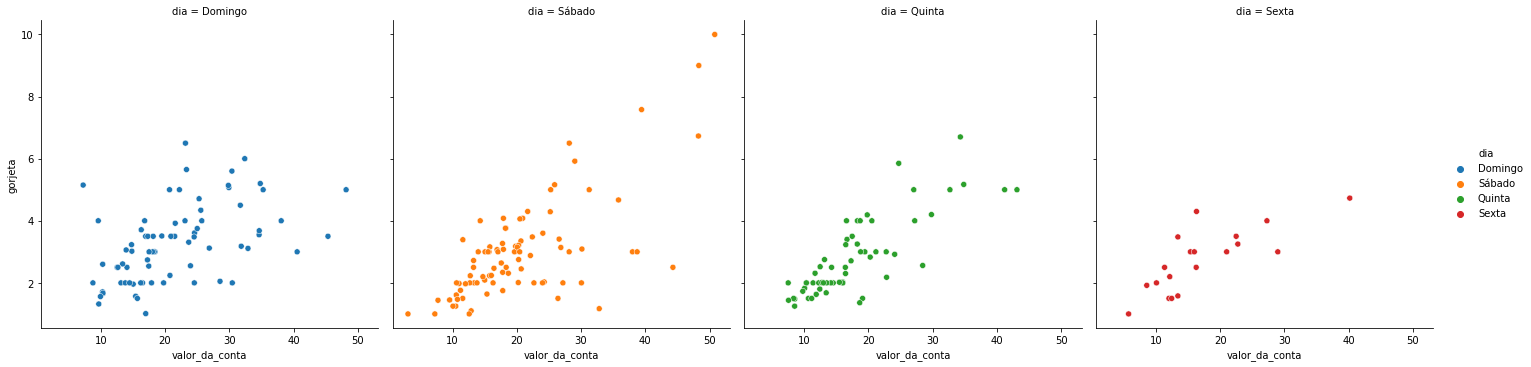

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia', col = 'dia', data = gorjetas)

**Valor da conta e da porcentagem relacionados aos dias da semana:**

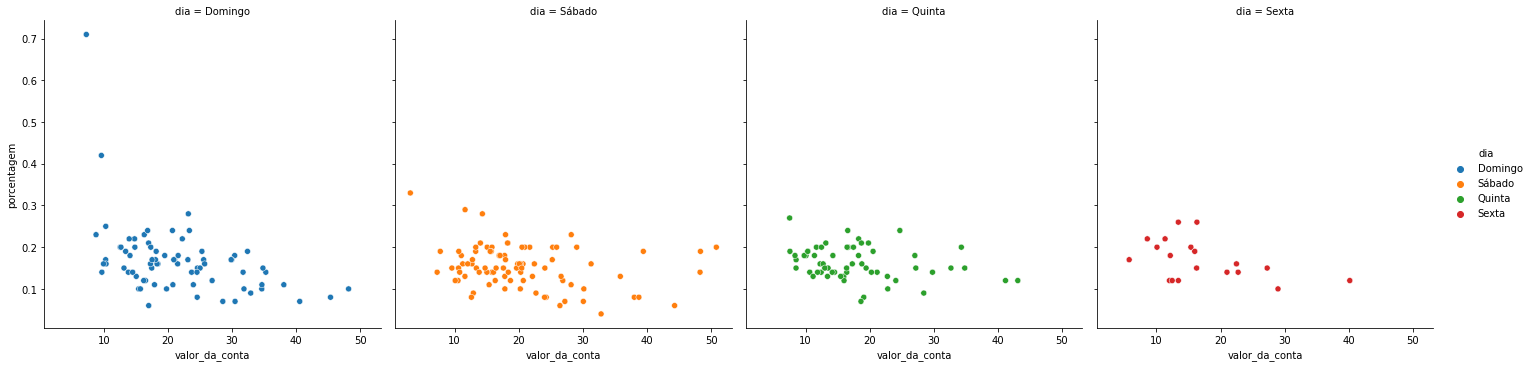

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia', col = 'dia', data = gorjetas)

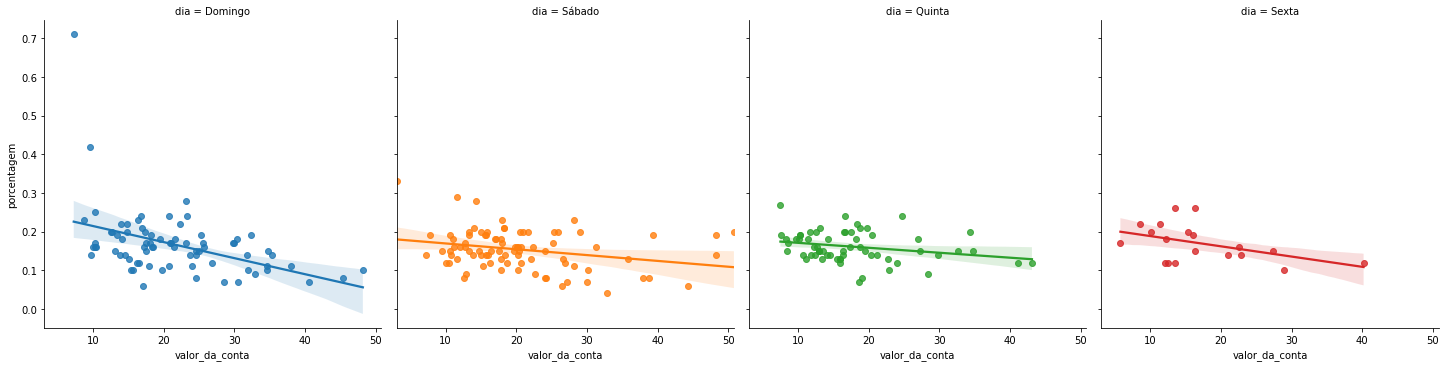

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia', col = 'dia', data = gorjetas)

**Média geral de gorjetas:**

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.9982786885245902


**Médias de cada dia da semana:**

In [ ]:
gorjetas.groupby(['dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


**Frequência dos dias:**

In [ ]:
gorjetas.dia.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

# Teste de hipótese

## H<sup>null</sup>

>**A distribuição do valor da conta é igual no Sábado e no Domingo**

## H<sup>alt</sup>

>**A distribuição do valor da conta não é igual no Sábado e no Domingo**

In [ ]:
valor_conta_domingo = gorjetas.query("dia == 'Domingo'").valor_da_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [ ]:
valor_conta_sabado = gorjetas.query("dia == 'Sábado'").valor_da_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [ ]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
r2

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [ ]:
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


**Nesse caso a hipótese é nula, pois a distribuição do valor da conta é igual no Sábado e no Domingo.**

## Análise IV - Análise do jantar e do almoço

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


## Será que há diferença no valor da conta e do percentual da taxa da gorjeta de cada uma dessas horas do dia?

In [ ]:
gorjetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

**Analisando o valor da conta conforme a hora (tipo de refeição):**

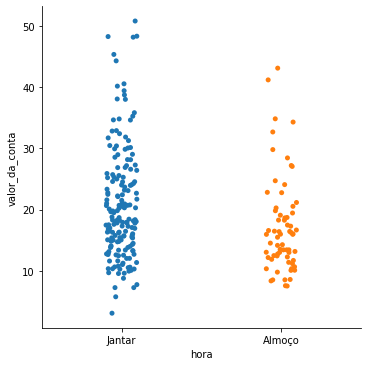

In [ ]:
sns.catplot(x = 'hora', y = 'valor_da_conta', data = gorjetas)

**Agrupando os dados para melhor visualização:**

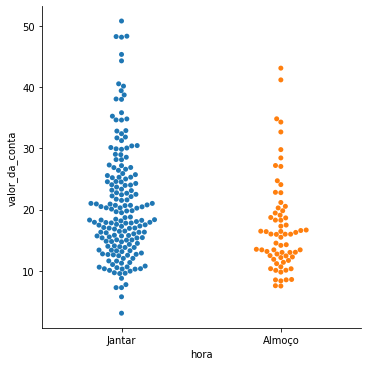

In [ ]:
sns.catplot(x = 'hora', y = 'valor_da_conta', kind = 'swarm', data = gorjetas)

<AxesSubplot:xlabel='hora', ylabel='valor_da_conta'>

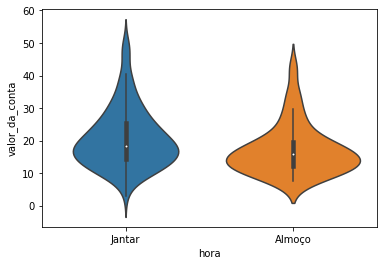

In [ ]:
sns.violinplot(x = 'hora', y = 'valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='hora', ylabel='valor_da_conta'>

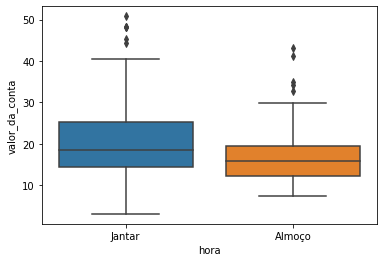

In [ ]:
sns.boxplot(x = 'hora', y = 'valor_da_conta', data = gorjetas)

**Histograma do valor da conta conforme a hora do almoço:**

In [ ]:
hora_almoco = gorjetas.query("hora == 'Almoço'").valor_da_conta
hora_almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

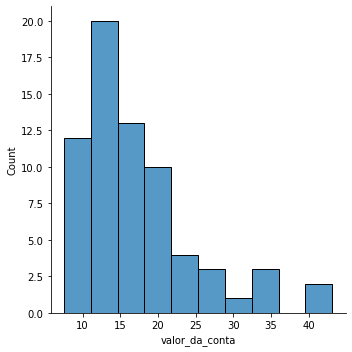

In [ ]:
sns.displot(hora_almoco)

**Histograma do valor da conta conforme a hora do jantar:**

In [ ]:
hora_jantar = gorjetas.query("hora == 'Jantar'").valor_da_conta
hora_jantar

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: valor_da_conta, Length: 176, dtype: float64

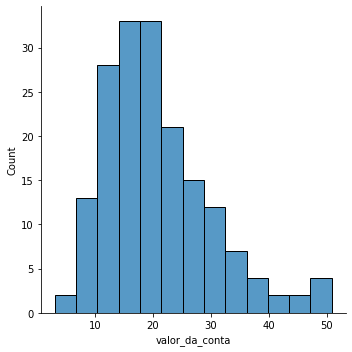

In [ ]:
sns.displot(hora_jantar)

## Será que a hora do dia está influenciando o valor da conta? As pessoas gastam mais no almoço ou na janta?

In [ ]:
# Claramente o valor da conta no jantar é maior do que no almoço, o mesmo vale para a gorjeta.
# Entretanto, a porcentagem de gorjetas é maior no almoço.

gorjetas.groupby(['hora']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese I

## H<sup>null</sup>

>**A distribuição do valor da conta é igual no almoço e no jantar**

## H<sup>alt</sup>

>**A distribuição do valor da conta não é igual no almoço e no jantar**

In [ ]:
r3 = ranksums(hora_almoco, hora_jantar)
r3

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

In [ ]:
print(f'O valor do p-value é de {r3.pvalue}')

O valor do p-value é de 0.0011791039723641672


**Neste caso a hipótese é alternativa e a distribuição do valor da conta não é igual no almoço e no jantar**

## Teste de hipótese II

## H<sup>null</sup>

>**A distribuição da taxa da gorjeta é igual no almoço e no jantar**

## H<sup>alt</sup>

>**A distribuição da taxa da gorjeta não é igual no almoço e no jantar**

In [ ]:
porcentagem_almoco = gorjetas.query("hora == 'Almoço'").porcentagem
porcentagem_almoco

77     0.15
78     0.13
79     0.16
80     0.15
81     0.20
       ... 
222    0.22
223    0.19
224    0.12
225    0.15
226    0.20
Name: porcentagem, Length: 68, dtype: float64

In [ ]:
porcentagem_jantar = gorjetas.query("hora == 'Jantar'").porcentagem
porcentagem_jantar

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
239    0.20
240    0.07
241    0.09
242    0.10
243    0.16
Name: porcentagem, Length: 176, dtype: float64

In [ ]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
r4

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

In [ ]:
print(f'O valor do p-value é {r4.pvalue}')

O valor do p-value é 0.2602493995587126


**A hipótese é nula, pois a distribuição da taxa da gorjeta é igual no almoço e no jantar**